# Set-up

In [1]:
# Load libraries
suppressMessages(library(Seurat))
suppressMessages(library(ArchR))
suppressMessages(library(parallel))
suppressMessages(library(tidyverse))
suppressMessages(library(BSgenome.Hsapiens.UCSC.hg38))
suppressMessages(library(rtracklayer))
suppressMessages(library(GenomicRanges))

Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘SummarizedExperiment’ was built under R version 4.3.2”
Warning message:
“package ‘MatrixGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘BSgenome’ was built under R version 4.3.2”
Warning message:
“package ‘Biostrings’ was built under R version 4.3.2”
Warning message:
“package ‘XVector’ was built under R version 4.3.2”
Warning message:
“package ‘BiocIO’ was built under R version 4.3.2”
Warning message:
“package ‘rtracklayer’ was built under R version 4.3.2”


In [2]:
# Params
archr_proj_path = "/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/2024_01_20/condition_within_batch/ext4/archr"
threads = 4
seed = 1234

In [3]:
# Move the working directory 
set.seed(seed)
addArchRThreads(threads)
setwd(archr_proj_path)

Setting default number of Parallel threads to 4.



The precompiled version of the hg38 genome in ArchR uses BSgenome.Hsapiens.UCSC.hg38, TxDb.Hsapiens.UCSC.hg38.knownGene, org.Hs.eg.db, and a blacklist that was merged using ArchR::mergeGR() from the hg38 v2 blacklist regions and from mitochondrial regions that show high mappability to the hg38 nuclear genome from Caleb Lareau and Jason Buenrostro. To set a global genome default to the precompiled hg38 genome:

In [4]:
# Add annotation
addArchRGenome("hg38")

Setting default genome to Hg38.



# Load the ArchR project

In [5]:
# Load the ArchR project
proj = loadArchRProject(path = "./")
proj

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

class: ArchRProject 
outputDirectory: /cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/2024_01_20/condition_within_batch/ext4/archr 
samples(7): dm44a dm34a ... dm14b dm24a
sampleColData names(1): ArrowFiles
cellColData names(23): Sample TSSEnrichment ... ReadsInPeaks FRIP
numberOfCells(1): 25434
medianTSS(1): 12.395
medianFrags(1): 20673

# UMAPs

In [8]:
# Plot based passed in vars
umap_plot_vars = c("Sample", "Clusters", "timepoint", "batch", "condition", "rna_annotation")
p <- c()
for (i in umap_plot_vars) {
    p[[i]] <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", name = i, embedding = "UMAP")
}

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-119b6b1728389e-Date-2024-01-21_Time-11-11-27.800911.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-119b6b1728389e-Date-2024-01-21_Time-11-11-27.800911.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-119b6b423ccf12-Date-2024-01-21_Time-11-11-33.746043.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-119b6b423ccf12-Date-2024-01-21_Time-11-11-33.746043.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-119b6b8bc9f47-Date-2024-01-21_Time-11-11-36.280463.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmb

In [10]:
# Save all the UMAPs
plotPDF(
    plotList = p, 
    name = "Plot-UMAP-Sample-Clusters.pdf", 
    ArchRProj = proj, 
    addDOC = FALSE, 
    width = 5, 
    height = 5
)

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!

Plotting Ggplot!



In [16]:
cell_data <- as.data.frame(getCellColData(ArchRProj = proj))

In [18]:
head(cell_data)

,Sample,TSSEnrichment,ReadsInTSS,ReadsInPromoter,ReadsInBlacklist,PromoterRatio,PassQC,NucleosomeRatio,nMultiFrags,nMonoFrags,⋯,DoubletScore,DoubletEnrichment,batch,timepoint,condition,timecourse,rna_annotation,Clusters,ReadsInPeaks,FRIP
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
dm44a#GTTAAGCTCCGGAACC-1,dm44a,10.215,22403,23997,932,0.1388844,1,1.663214,21160,32439,⋯,30.4852445,3.2000000,A2,72hr,Ex-4,A2_Ex-4,SC.EC,C4,51724,0.2997172
dm44a#GCTCTGGCAAGGTACG-1,dm44a,11.244,23406,24680,955,0.1519124,1,2.227679,21891,25167,⋯,0.0000000,0.9333333,A2,72hr,Ex-4,A2_Ex-4,SC.EC,C7,51477,0.3171797
dm44a#CTGACATAGTGCACGC-1,dm44a,11.916,24124,24802,815,0.1618930,1,1.801039,19051,27347,⋯,15.2886151,2.5333333,A2,72hr,Ex-4,A2_Ex-4,SC.EC,C6,53445,0.3491175
dm44a#TTTCTTGCAGAGGGAG-1,dm44a,11.775,23351,24497,855,0.1603228,1,2.076387,20075,24834,⋯,24.1122706,2.9333333,A2,72hr,Ex-4,A2_Ex-4,SC.EC,C6,53469,0.3502214
dm44a#GTAAGCTTCATAAGCC-1,dm44a,11.163,20638,21463,857,0.1514016,1,2.150267,18205,22500,⋯,0.9724965,1.6666667,A2,72hr,Ex-4,A2_Ex-4,SC.EC,C6,46518,0.3283593
dm44a#TAGCCGGGTTAGACCA-1,dm44a,11.708,21172,21555,793,0.1559583,1,2.001173,17790,23026,⋯,0.0000000,0.9333333,A2,72hr,Ex-4,A2_Ex-4,SC.EC,C6,47539,0.3442311


Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”


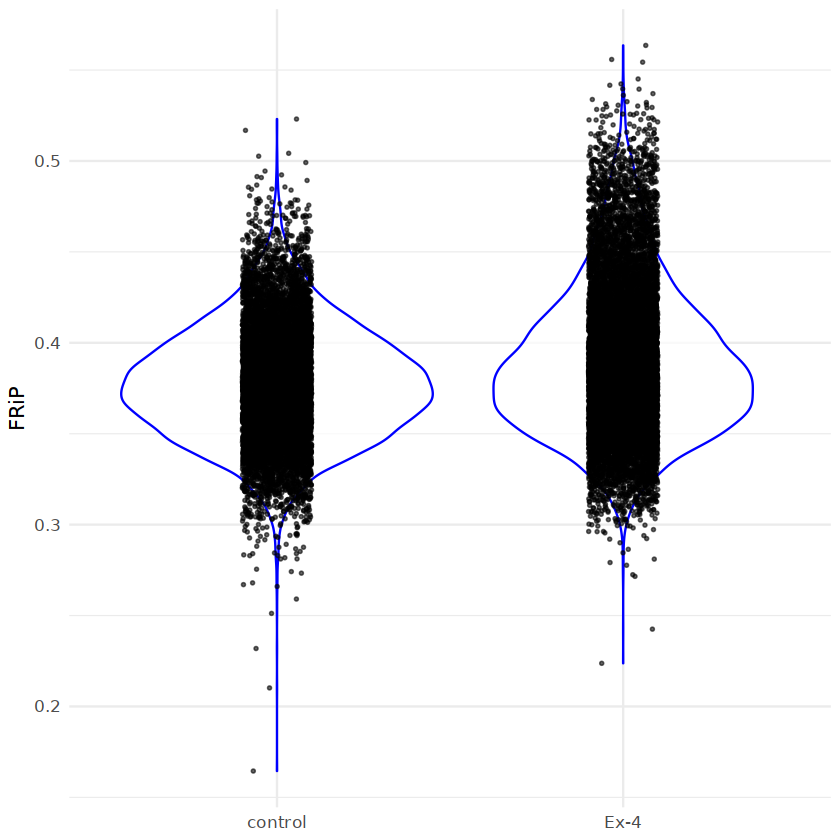

In [25]:
ggplot(cell_data, aes(x=condition, y = FRIP)) + 
  geom_violin(aes(fill = FRIP), color = "blue", alpha = 0.7) +  # Colored violin plot with transparency
  geom_jitter(width = 0.1, color = "black", size = 0.5, alpha = 0.6) +  # Add jittered data points
  scale_fill_gradient(low = "skyblue", high = "blue") +  # Gradient fill
  labs(y = "FRiP") +
  theme_minimal() +  # Minimalistic theme
  theme(
    plot.title = element_text(size = 14, face = "bold"),
    axis.title.x = element_blank(),
    axis.title.y = element_text(size = 12),
    axis.text = element_text(size = 10),
    legend.position = "none"  # Hide legend
  )

# DONE!

---